In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils_comp as utils
import utils_max_flow
import utils_centrality
import pickle

### Load data from 'N-k_CENTRALITY.ipynb' and 'N-k_MAX_FLOW.ipynb'

In [2]:
centrality_random_node_removal_df = pd.read_pickle('results/centrality/iggielgn/random_node_removal.pkl')
centrality_greedy_node_removal_df = pd.read_pickle('results/centrality/iggielgn/greedy_node_removal.pkl')

max_flow_random_node_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/random_node_removal_df.pkl')
max_flow_greedy_node_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/wfcr_node_removal_df.pkl')

centrality_random_edge_removal_df = pd.read_pickle('results/centrality/iggielgn/random_edge_removal.pkl')
centrality_greedy_edge_removal_df = pd.read_pickle('results/centrality/iggielgn/greedy_edge_removal.pkl')

max_flow_random_edge_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/random_edge_removal_df.pkl')
max_flow_greedy_edge_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/wfcr_edge_removal_df.pkl')

In [3]:
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed' 

# Direct comparison of index 

### Node

In [ ]:
utils.plot_direct_comparison(centrality_greedy_node_removal_df, centrality_random_node_removal_df, max_flow_greedy_node_removal_df, max_flow_random_node_removal_df)

In [ ]:
utils.common_entities(centrality_greedy_node_removal_df, max_flow_greedy_node_removal_df)

### Edge

In [ ]:
utils.plot_direct_comparison(centrality_greedy_edge_removal_df, centrality_random_edge_removal_df, max_flow_greedy_edge_removal_df, max_flow_random_edge_removal_df)

In [ ]:
# Ignore SettingWithCopyWarning
pd.options.mode.chained_assignment = None

corrected_centrality_greedy_edge_removal_df = centrality_greedy_edge_removal_df.iloc[1:]
corrected_centrality_greedy_edge_removal_df['removed_entity'] = corrected_centrality_greedy_edge_removal_df['removed_entity'].apply(lambda edge: tuple(edge))
for i in range(len(corrected_centrality_greedy_edge_removal_df)):
    if corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i] not in G_simple_directed.edges():
        corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i] = (corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i][1], corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i][0])

corrected_max_flow_greedy_edge_removal_df = max_flow_greedy_edge_removal_df.iloc[1:]
corrected_max_flow_greedy_edge_removal_df['removed_entity'] = corrected_max_flow_greedy_edge_removal_df['removed_entity'].apply(lambda edge: tuple(edge))
for i in range(len(corrected_max_flow_greedy_edge_removal_df)):
    if corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i] not in G_simple_directed.edges():
        corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i] = (corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i][1], corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i][0])
        

In [ ]:
utils.common_entities(corrected_centrality_greedy_edge_removal_df, corrected_max_flow_greedy_edge_removal_df)

# Transformation between 'domains'

In [4]:
# Limit to 100 removed entities
centrality_greedy_node_removal_df = centrality_greedy_node_removal_df.iloc[:101]
centrality_greedy_edge_removal_df = centrality_greedy_edge_removal_df.iloc[:101]

In [5]:
centrality_greedily_removed_nodes_lst = centrality_greedy_node_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_nodes_lst = max_flow_greedy_node_removal_df['removed_entity'].dropna().tolist()

centrality_greedily_removed_edges_lst = centrality_greedy_edge_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_edges_lst = max_flow_greedy_edge_removal_df['removed_entity'].dropna().tolist()

In [6]:
# Correct directionality of edges
centrality_greedily_removed_edges_lst = utils.correct_edges([tuple(e) for e in centrality_greedily_removed_edges_lst])
max_flow_greedily_removed_edges_lst = utils.correct_edges([tuple(e) for e in max_flow_greedily_removed_edges_lst])

### Max flow based N-k analysis employing greedy entity removal order resulting from centrality analysis

In [7]:
#centrality_greedily_removed_nodes_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='node', greedy_centrality_lst=centrality_greedily_removed_nodes_lst)
#centrality_greedily_removed_nodes_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')
centrality_greedily_removed_nodes_max_flow_df = pd.read_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')

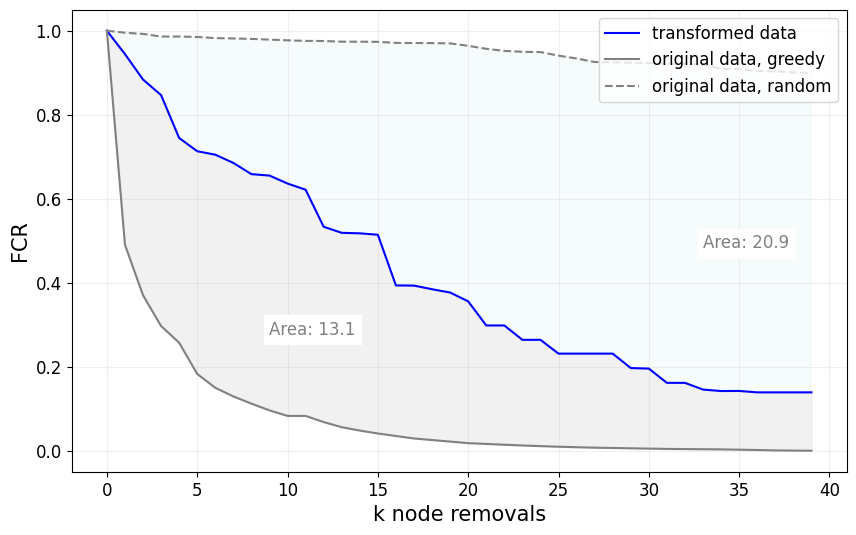

<Figure size 640x480 with 0 Axes>

In [8]:
fig = utils.plot_transform_comparison(centrality_greedily_removed_nodes_max_flow_df, max_flow_greedy_node_removal_df, max_flow_random_node_removal_df, 'capacity_robustness_max_flow')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/FCR_using_greedy_nodes_NPI.png', bbox_inches='tight', pad_inches=0)

In [9]:
#centrality_greedily_removed_edges_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='edge', greedy_centrality_lst=centrality_greedily_removed_edges_lst)
#centrality_greedily_removed_edges_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')
centrality_greedily_removed_edges_max_flow_df = pd.read_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')

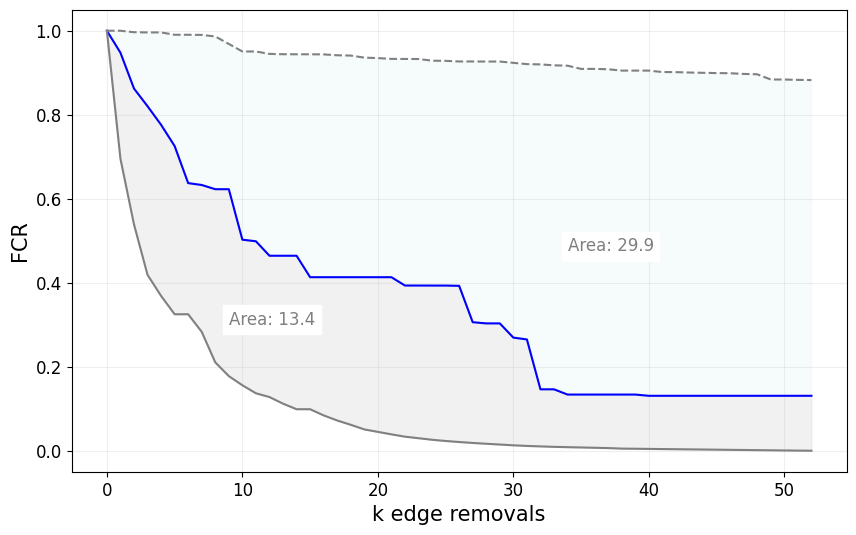

<Figure size 640x480 with 0 Axes>

In [10]:
fig = utils.plot_transform_comparison(centrality_greedily_removed_edges_max_flow_df, max_flow_greedy_edge_removal_df, max_flow_random_edge_removal_df, 'capacity_robustness_max_flow')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/FCR_using_greedy_edges_NPI.png', bbox_inches='tight', pad_inches=0)

### Centrality based N-k analysis employing greedy entity removal order resulting from max flow analysis

In [11]:
max_flow_greedily_removed_nodes_centrality_df = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='node', greedy_max_flow_lst=max_flow_greedily_removed_nodes_lst)
max_flow_greedily_removed_nodes_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')
max_flow_greedily_removed_nodes_centrality_df = pd.read_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')

N-k iterations:   2%|▏         | 40/2501 [29:00<29:44:29, 43.51s/it]


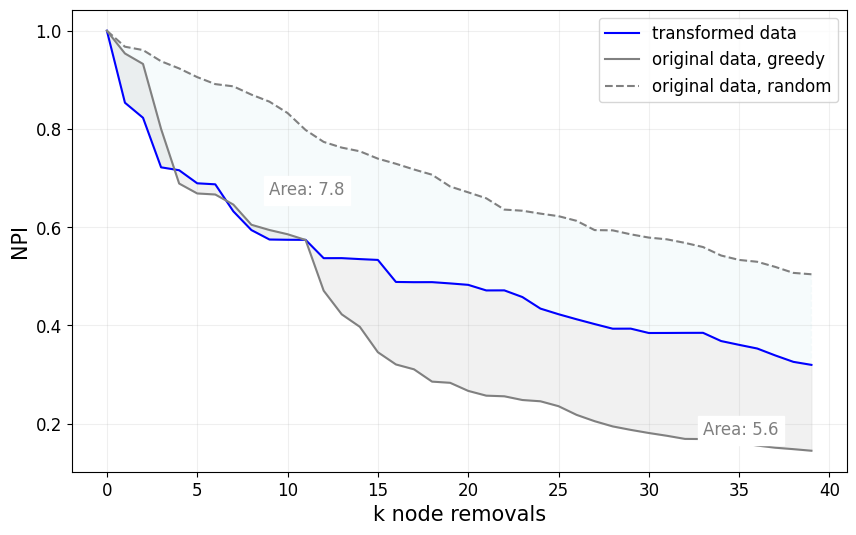

<Figure size 640x480 with 0 Axes>

In [12]:
fig = utils.plot_transform_comparison(max_flow_greedily_removed_nodes_centrality_df, centrality_greedy_node_removal_df, centrality_random_node_removal_df, 'NPI')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/NPI_using_greedy_nodes_FCR.png', bbox_inches='tight', pad_inches=0)

In [13]:
max_flow_greedily_removed_edges_centrality_df = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='edge', greedy_max_flow_lst=max_flow_greedily_removed_edges_lst)
max_flow_greedily_removed_edges_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')
max_flow_greedily_removed_edges_centrality_df = pd.read_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')

N-k iterations:   2%|▏         | 53/2501 [38:11<29:23:42, 43.23s/it]


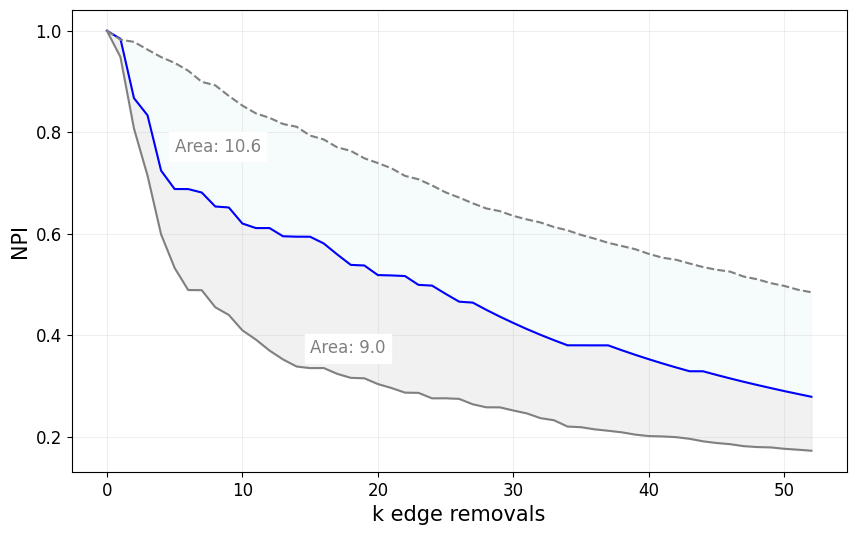

<Figure size 640x480 with 0 Axes>

In [14]:
fig = utils.plot_transform_comparison(max_flow_greedily_removed_edges_centrality_df, centrality_greedy_edge_removal_df, centrality_random_edge_removal_df, 'NPI')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/NPI_using_greedy_edges_FCR.png', bbox_inches='tight', pad_inches=0)